<a href="https://colab.research.google.com/github/Avi-gp/CODECLAUSE/blob/main/CodeClauseInternship_Wine_Quality_Prediction/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Suryansh Gupta***

# ***Wine Quality prediction***


# ***Random Forest Classifier***

In [800]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

***Data Collection***

In [801]:
#loading the Dataset
wine_dataset = pd.read_csv('/content/drive/MyDrive/CODECLAUSE/Wine Quality Prediction/winequality-red.csv')


In [802]:
wine_dataset.shape

(1599, 12)

In [803]:
wine_dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


from matplotlib import pyplot as plt
_df_144['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_145['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_146['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_147['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_148.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_149.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_150.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_151.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_152['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_153['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_154['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_155['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

In [804]:
#Checking missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [805]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


***Data Analysis And Visualization***

In [806]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


from matplotlib import pyplot as plt
_df_156['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_157['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_158['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_159['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_160.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_161.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_162.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_163.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_164['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_165['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_166['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_167['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

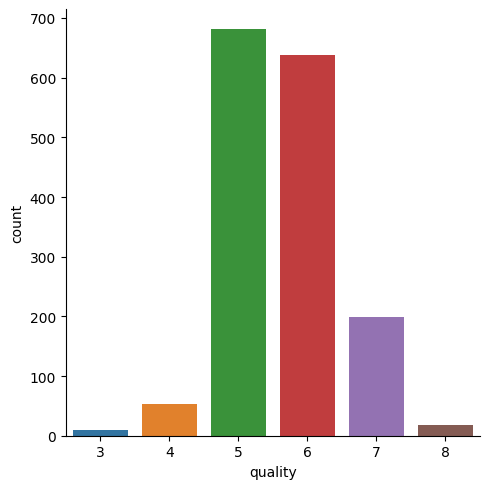

In [807]:
sns.catplot(x='quality' , data = wine_dataset , kind = 'count')

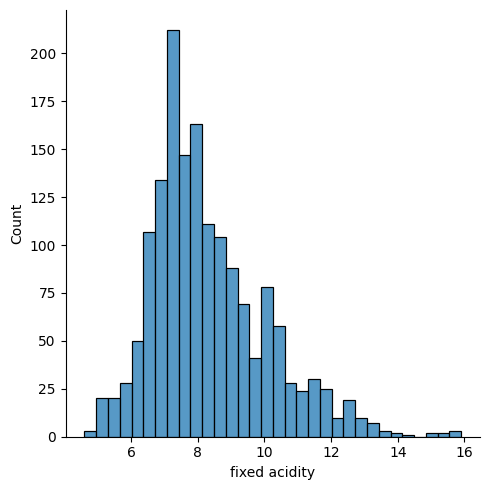

In [808]:
sns.displot(wine_dataset['fixed acidity'])
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

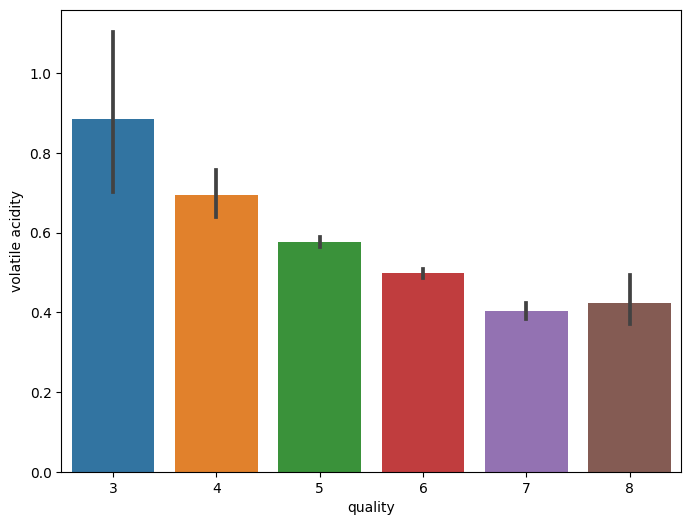

In [809]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'volatile acidity' , data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

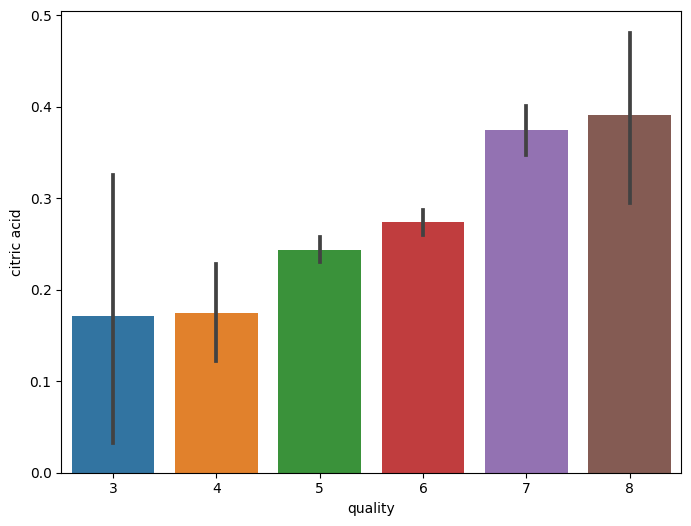

In [810]:
# citric acid vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'citric acid' , data = wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

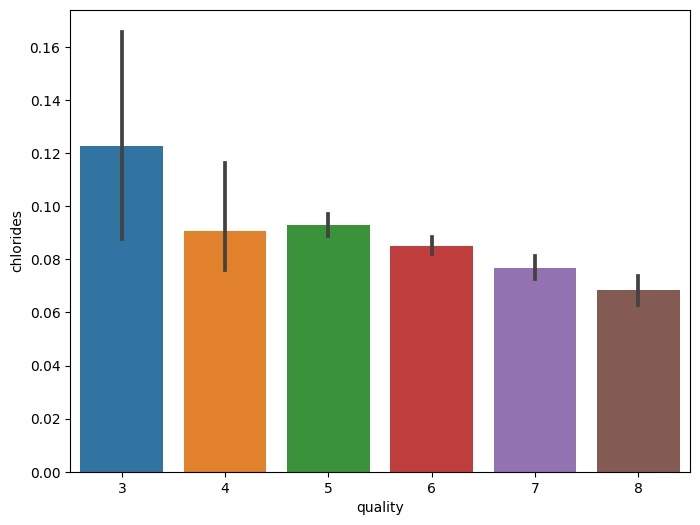

In [811]:
# chlorides vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'chlorides' , data = wine_dataset)

<Axes: xlabel='quality', ylabel='fixed acidity'>

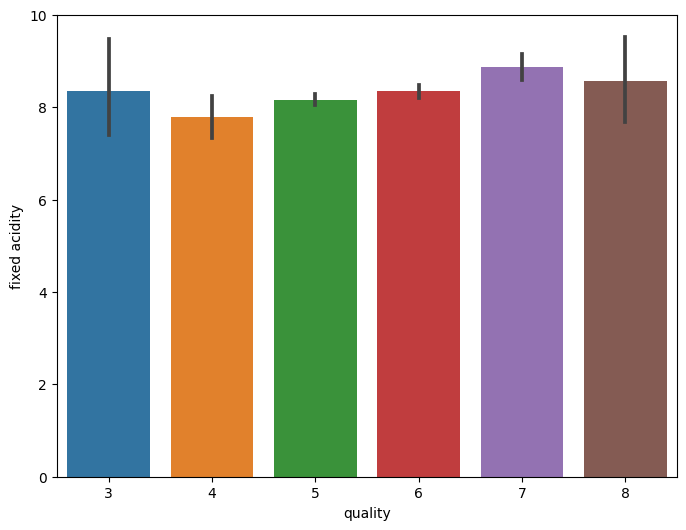

In [812]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x = 'quality' , y = 'fixed acidity' , data = wine_dataset)

***Correlation***

In [813]:
correlation = wine_dataset.corr()

<Axes: >

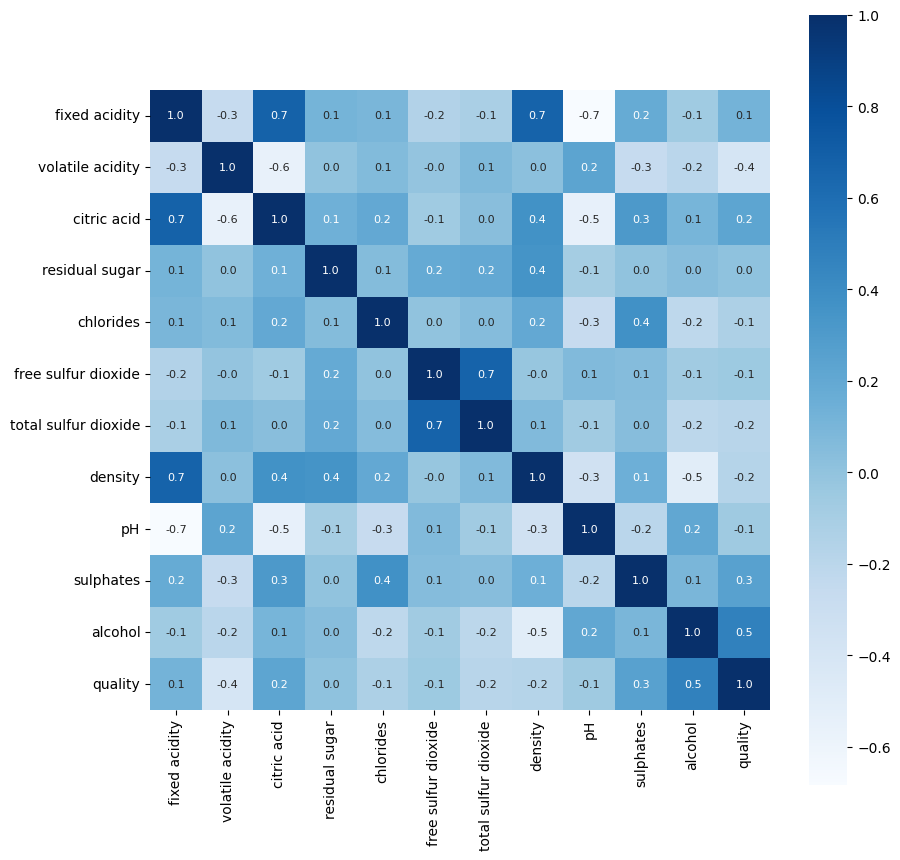

In [814]:
#Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar = True , square = True , fmt = '.1f' , annot = True , annot_kws = {'size':8} , cmap = 'Blues')

***Data Preprocessing***

In [815]:
# Separate the data and label
X = wine_dataset.drop('quality' , axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


from matplotlib import pyplot as plt
X['fixed acidity'].plot(kind='hist', bins=20, title='fixed acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['citric acid'].plot(kind='hist', bins=20, title='citric acid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['residual sugar'].plot(kind='hist', bins=20, title='residual sugar')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='fixed acidity', y='volatile acidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='volatile acidity', y='citric acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='citric acid', y='residual sugar', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='residual sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['fixed acidity'].plot(kind='line', figsize=(8, 4), title='fixed acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['volatile acidity'].plot(kind='line', figsize=(8, 4), title='volatile acidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['citric acid'].plot(kind='line', figsize=(8, 4), title='citric acid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['residual sugar'].plot(kind='line', figsize=(8, 4), title='residual sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

***Label Binarization***

In [816]:
Y = wine_dataset['quality'].apply(lambda y_values : 1 if y_values>=7 else 0)

In [817]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

***Splitting Data Into Train And Test***

In [818]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=3 )

In [819]:
print(Y.shape , Y_train.shape , Y_test.shape)

(1599,) (1279,) (320,)


***Training Model***

***Random Forest Classifier***

In [860]:
rf_model = RandomForestClassifier()

In [864]:
rf_model.fit(X_train , Y_train)

RandomForestClassifier()

***Model Evaluation***

***Accuracy Score***

In [865]:
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [866]:
print('Acuracy of Randon Forest Classifiern Model :' , test_data_accuracy)


Acuracy of Randon Forest Classifiern Model : 0.934375


In [867]:
print('Acuracy of Randon Forest Classifiern Model in % :' , test_data_accuracy * 100)

Acuracy of Randon Forest Classifiern Model in % : 93.4375


In [868]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test,X_test_prediction)
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test,X_test_prediction)
f1 = f1_score(Y_test,X_test_prediction)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

metrics_df


,Metric,Score
0,Accuracy,0.934375
1,Precision,0.807692
2,Recall,0.567568
3,F1 Score,0.666667


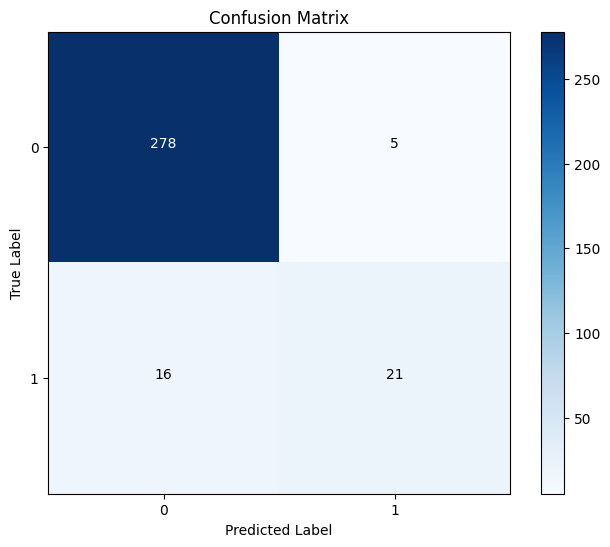

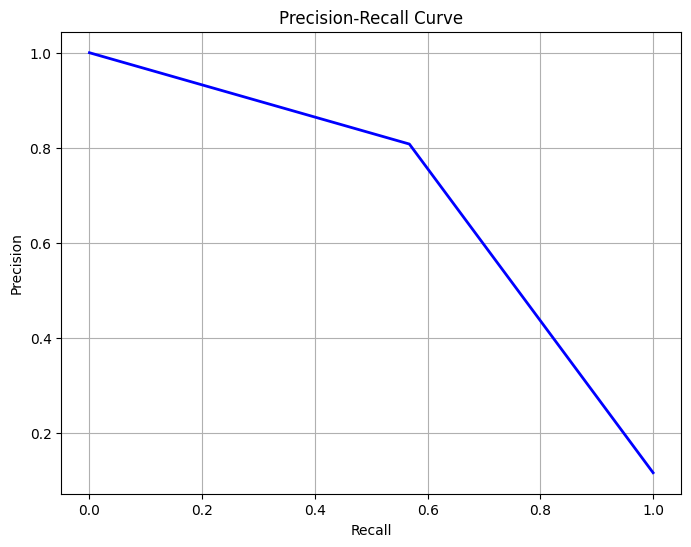

In [869]:
# Visualize
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.utils import shuffle

# Assuming X_test_prediction contains the predicted labels for your test set

# Create a confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to the plot
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Create precision-recall curve
precision, recall, _ = precision_recall_curve(Y_test, X_test_prediction)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


***Input Data For Predictive System***

In [894]:
# Select random rows from Wine Dataset
random_rows = wine_dataset.sample(n=1, replace=False)

print(random_rows.values)

# Drop Quality feature
random_rows = random_rows.drop('quality', axis=1)

# Assign random row values as input data
input_data = random_rows.values

# Convert input Data to nummpy array
input_data_array = np.asarray(input_data)

#Reshape the array
input_data_reshaped = input_data_array.reshape(1,-1)


[[ 7.5     0.64    0.      2.4     0.077  18.     29.      0.9965  3.32
   0.6    10.      6.    ]]


***Random Forest Classifier Predictive System***

In [879]:
# RandomForestClassifier Prediction model
rf_model_predictions = rf_model.predict(input_data_reshaped)

print('\n')
print(rf_model_predictions)

#if prediction is 1 then wine quality is good , otherwise it is bad

if (rf_model_predictions[0]==1):
  print("\nThe Quality Of Wine is Good !!!\n")
  print("Good Quality Wine ! Savor your beverage and enjoy the moment !\n")

else:
  print("\nThe Quality Of Wine is Bad !!!\n")
  print(" Bad quality , Avoid drinking !\n")



[0]

The Quality Of Wine is Bad !!!

 Bad quality , Avoid drinking !



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#***Prediction Using Logistic Regression***

***Logistic Regression Fitting***

In [889]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lr_model = LogisticRegression(solver='sag')
lr_model.fit(X_train_scaled, Y_train)


LogisticRegression(solver='sag')

In [890]:
lr_model.feature_names_in_ = list(X_train.columns)
Y_pred = lr_model.predict(X_test)

In [891]:
lr_test_acc = accuracy_score(Y_test,Y_pred)

print("Accuracy Score of Logistic Regression Model:",lr_test_acc)

Accuracy Score of Logistic Regression Model: 0.7875


***Logistic Regression Predictive Model***

In [895]:
# prompt: probability of prediction

lr_model.predict_proba(input_data_reshaped)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99469446, 0.00530554]])

In [896]:
#Logistic Regression Prediction Model
lr_model_predictions = lr_model.predict(input_data_reshaped)

print('\n')
print(lr_model_predictions)

#if prediction is 1 then wine quality is good , otherwise it is bad

if (lr_model_predictions[0]==1):
  print("\nThe Quality Of Wine is Good !!!\n")
  print("Good Quality Wine ! Savor your beverage and enjoy the moment !\n")

else:
  print("\nThe Quality Of Wine is Bad !!!\n")
  print(" Bad quality , Avoid drinking !\n")



[0]

The Quality Of Wine is Bad !!!

 Bad quality , Avoid drinking !



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ***Prediction Using GaussianNB***

***Model Fitting***

In [897]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)


GaussianNB()

***Predictions***

In [898]:
gnb_predictions = gnb_model.predict(X_test)

***Model Evaluation :- Accuracy ***

In [899]:
acc = accuracy_score(Y_test,gnb_predictions)

print("Accuracy Score of GaussianNB Model:",acc)


Accuracy Score of GaussianNB Model: 0.85625


In [900]:
from sklearn.metrics import classification_report

gnb_report = classification_report(Y_test, gnb_predictions)
print(gnb_report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       283
           1       0.42      0.62      0.50        37

    accuracy                           0.86       320
   macro avg       0.68      0.75      0.71       320
weighted avg       0.89      0.86      0.87       320



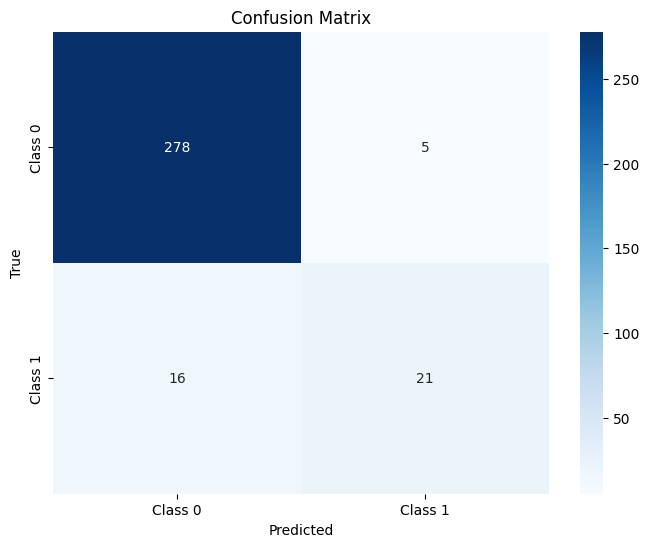

In [901]:
# Visualize confusion matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

***GaussianNB Predictive Model***

In [902]:
# Prediction Model
gnb_model_predictions = gnb_model.predict(input_data_reshaped)

print('\n')
print(gnb_model_predictions)

#if prediction is 1 then wine quality is good , otherwise it is bad

if (gnb_model_predictions[0]==1):
  print("\nThe Quality Of Wine is Good !!!\n")
  print("Good Quality Wine ! Savor your beverage and enjoy the moment !\n")

else:
  print("\nThe Quality Of Wine is Bad !!!\n")
  print(" Bad quality , Avoid drinking !\n")



[0]

The Quality Of Wine is Bad !!!

 Bad quality , Avoid drinking !



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#***END***